# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

sb.set()

# Viewing the Tiktok songs data

In [3]:
songsdata = pd.read_csv("Full_Dataset.csv")
songsdata

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,Year
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,298933,2022
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,167303,2022
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.35000,0.000000,0.1500,0.841,131.430,4,163026,2022
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4,238805,2022
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.09950,0.000000,0.3350,0.722,108.966,4,191822,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,Skinny Legend Anthem,Ava Louise,32,Skinny Legend Anthem,50,0.845,0.518,-7.568,1,11,0.2990,0.07030,0.000000,0.1220,0.443,129.951,4,135993,2019
964,Material Girl,Madonna,77,Celebration (double disc version),78,0.742,0.883,-3.419,1,0,0.0329,0.33300,0.000008,0.0964,0.978,136.506,4,240280,2019
965,I Wish - Radio Edit,Skee-Lo,51,I Wish,63,0.715,0.738,-10.139,1,7,0.1570,0.00826,0.000000,0.2600,0.573,97.877,4,252307,2019
966,Oh No I Got a Disease,Buss Crew,11,Oh No I Got a Disease,26,0.649,0.735,-4.365,0,10,0.7300,0.14600,0.000000,0.1240,0.845,86.704,5,134769,2019


Comments about the variables of dataset :

We are looking for what musical and personal factors can effect to the popularity and success of the songs released on Tiktok. 

Therefore, the variable track_pop ( track popularity ) will be considered as the main predicted value of this dataset.

# Visualisation of Tiktok songs data

Firstly, let's analysize the track popularity of the tiktok songs data.

In [4]:
track_pop = songsdata["track_pop"]
track_pop.describe()

count    968.000000
mean      59.154959
std       24.121734
min        0.000000
25%       51.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: track_pop, dtype: float64

In [5]:
track_pop.skew()

-1.25446334384037

<Axes: >

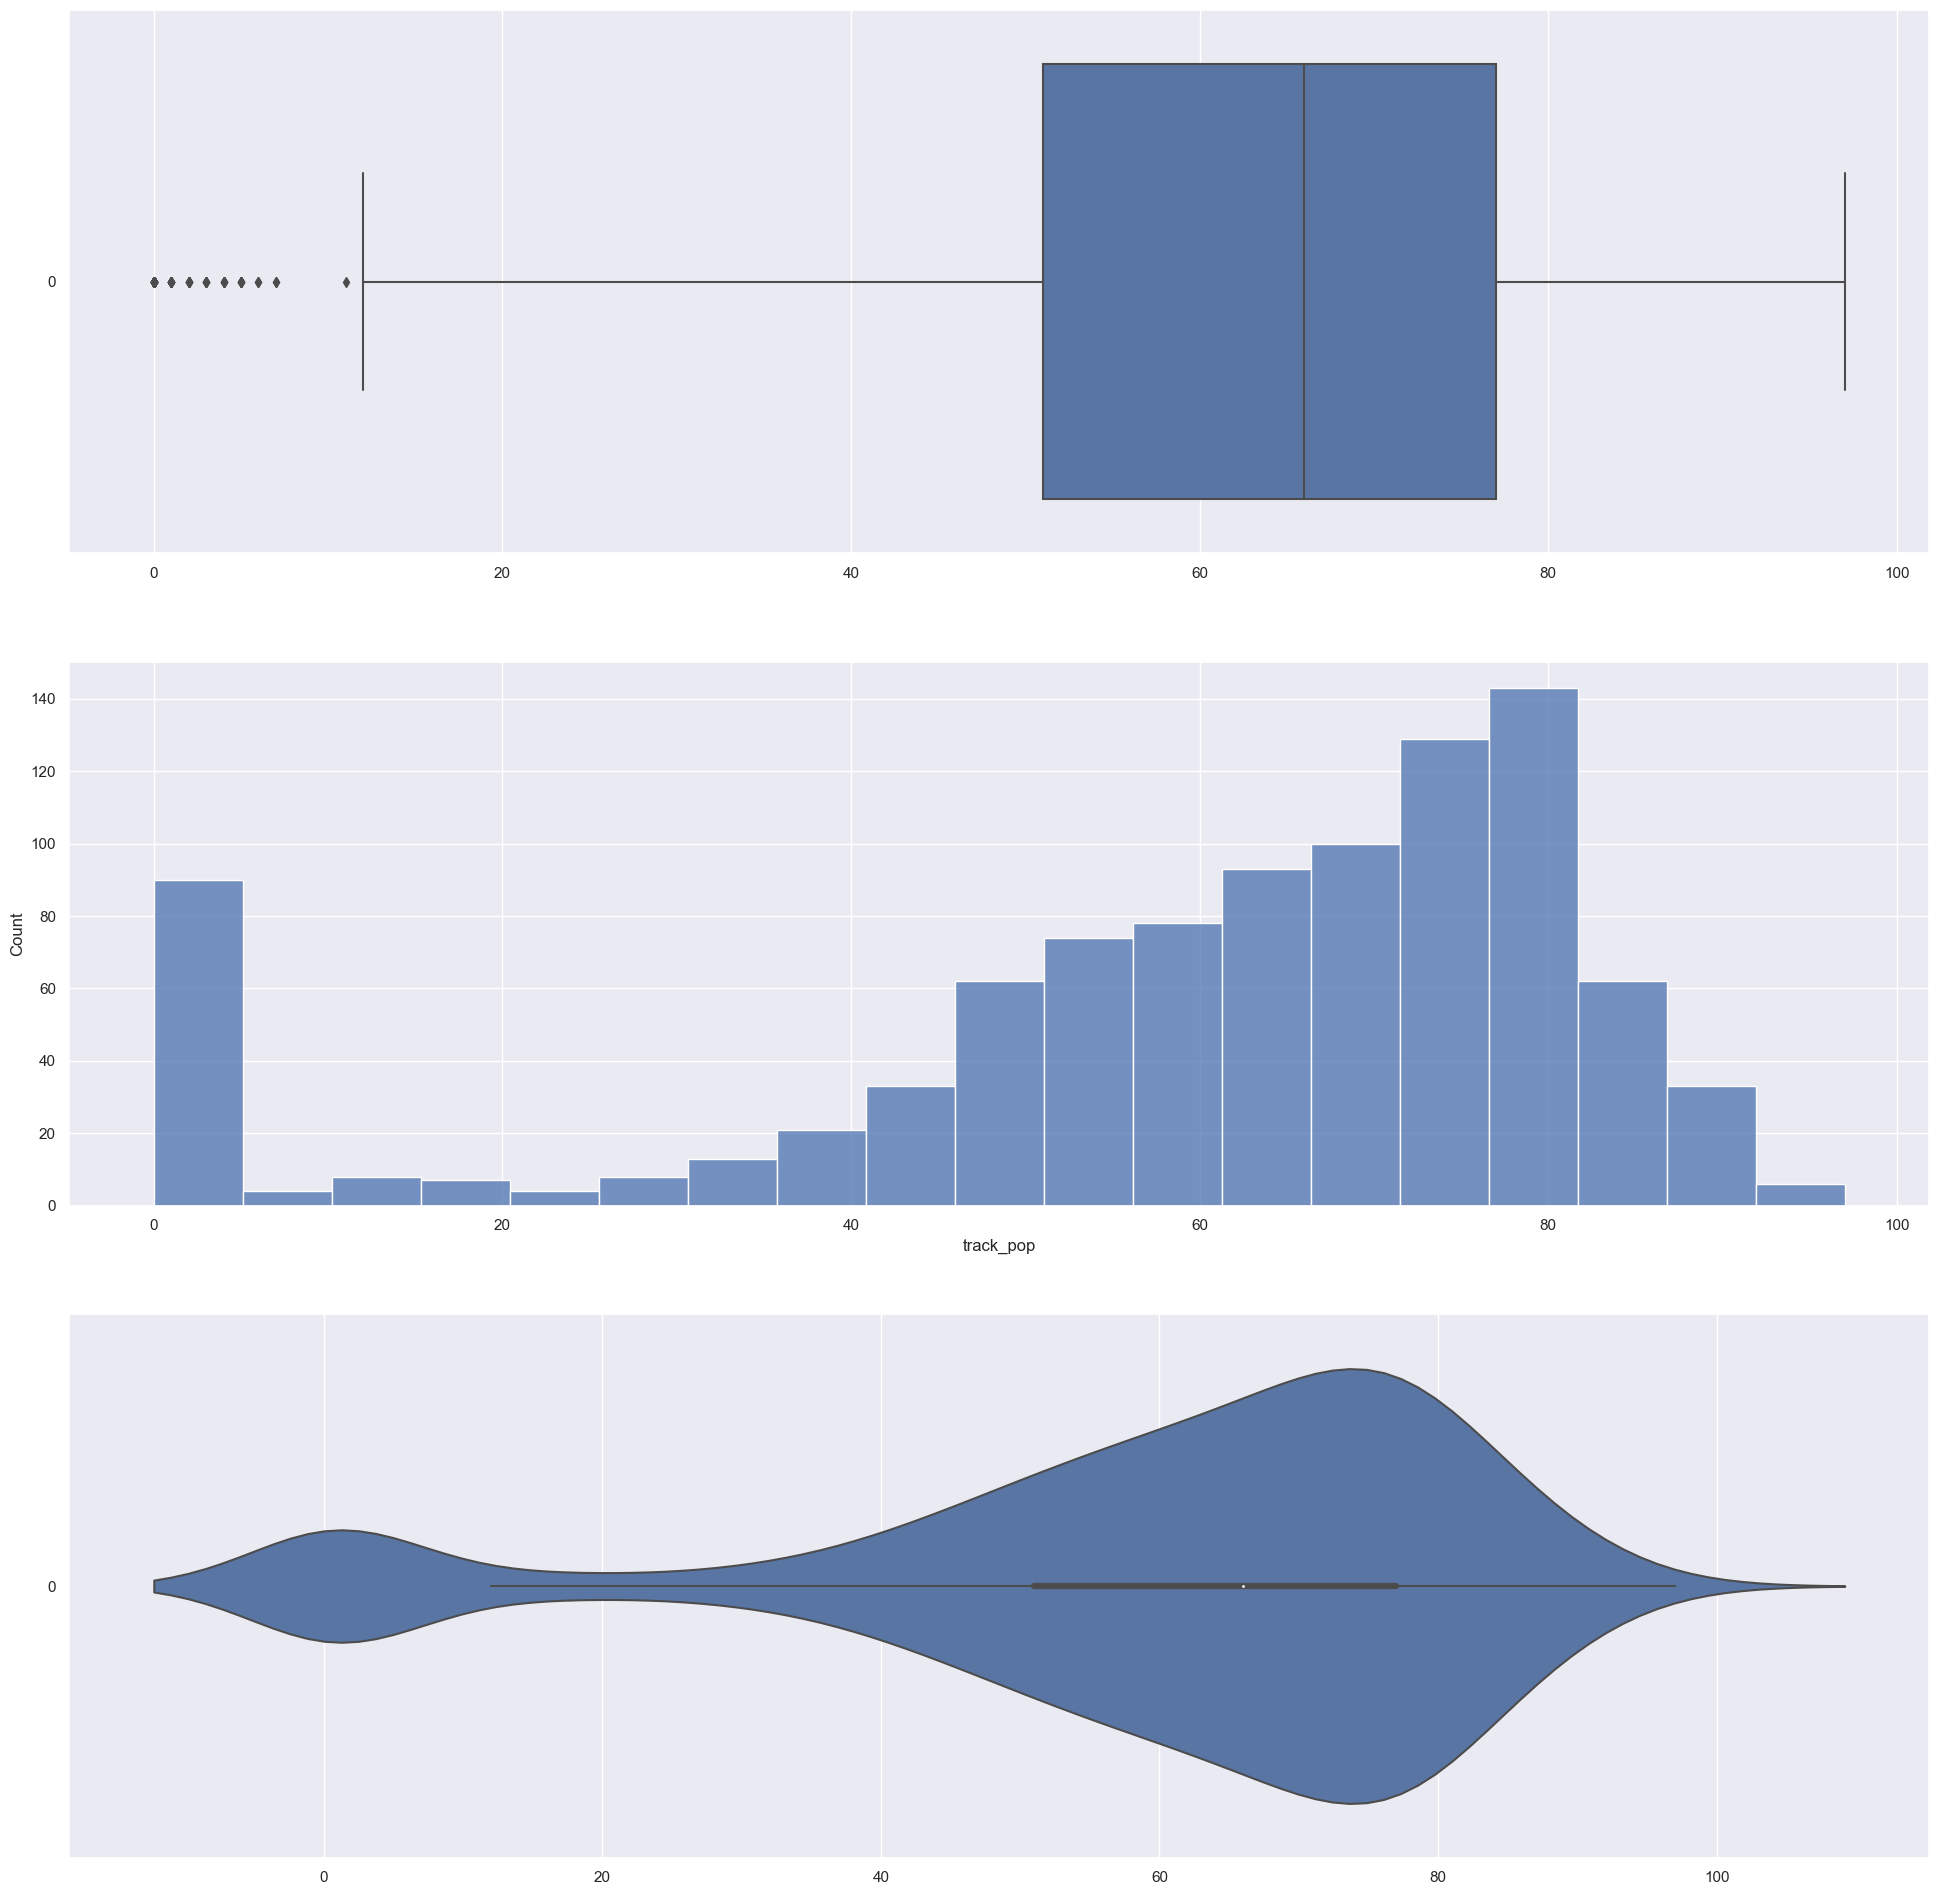

In [6]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = track_pop, orient = "h", ax = axes[0])
sb.histplot(data = track_pop, ax = axes[1])
sb.violinplot(data = track_pop, orient = "h", ax = axes[2])

##### Comments : 
+ The distribution of track popularity is highly skewed to the left. 
+ The majority of track popularity will be in the range from 40 to around 85, with the mean being around 60.
+ The range of this distribution is from 0 to 97.

--> This dataset is good enough for prediction when it includes both non-popular songs and popular songs.


Now, we're going to visualize each variable and check whether that variable is related to track popularity or not.

## Numerical data 

At first, we'll look at the numerical variables.

In [7]:
numericaldata = songsdata[[ "artist_pop", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]

Our variables range from personal factor ( e.g "artist_pop" ) to musical factors. Elements like "danceability", "valence", and "tempo" quantify a track's rhythm and mood, while "energy" and "loudness" capture its intensity. Furthemore, some additional attributes such as "speechiness", "acousticness", and "instrumentalness" provide insight into the track's vocal and instrumental composition. Besides, the presence of live audience sound is measured by "liveness", and the length of the track is precisely noted by "duration_ms", rounding out the variables that could be key in predicting musical popularity.

Let's look at the distribution of these above numerical variables

In [8]:
numericaldata.describe()

,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,65.237603,0.723252,0.642243,-6.652847,0.130046,0.220360,0.023385,0.184712,0.546739,122.306415,185383.035124
std,17.607444,0.131491,0.160734,2.596636,0.128079,0.243061,0.110073,0.140592,0.217989,25.947943,48039.847341
min,0.000000,0.174000,0.045800,-23.928000,0.025200,0.000038,0.000000,0.019400,0.034800,62.619000,37632.000000
25%,54.000000,0.651000,0.525000,-7.958000,0.044100,0.026675,0.000000,0.093425,0.387750,103.033500,155062.250000
50%,67.000000,0.732000,0.660000,-6.245500,0.074550,0.124500,0.000000,0.123000,0.544500,121.364000,180797.500000
75%,79.000000,0.813250,0.764250,-4.837250,0.177250,0.329000,0.000162,0.251500,0.723250,135.993500,214719.750000
max,95.000000,0.980000,0.989000,-1.609000,0.907000,0.984000,0.939000,0.944000,0.978000,210.857000,467587.000000


In [9]:
for var in numericaldata:
    print("The skewness of " + var + " distribution is: " , numericaldata[var].skew() , "\n") 

The skewness of artist_pop distribution is:  -0.7235846841853043 

The skewness of danceability distribution is:  -0.6092293525777324 

The skewness of energy distribution is:  -0.3913793142367195 

The skewness of loudness distribution is:  -1.4468671485158926 

The skewness of speechiness distribution is:  2.054347717877567 

The skewness of acousticness distribution is:  1.2375638071097095 

The skewness of instrumentalness distribution is:  5.914380030518994 

The skewness of liveness distribution is:  1.8336198558297732 

The skewness of valence distribution is:  -0.15768244201080153 

The skewness of tempo distribution is:  0.4958399979997434 

The skewness of duration_ms distribution is:  0.6221059845238149 



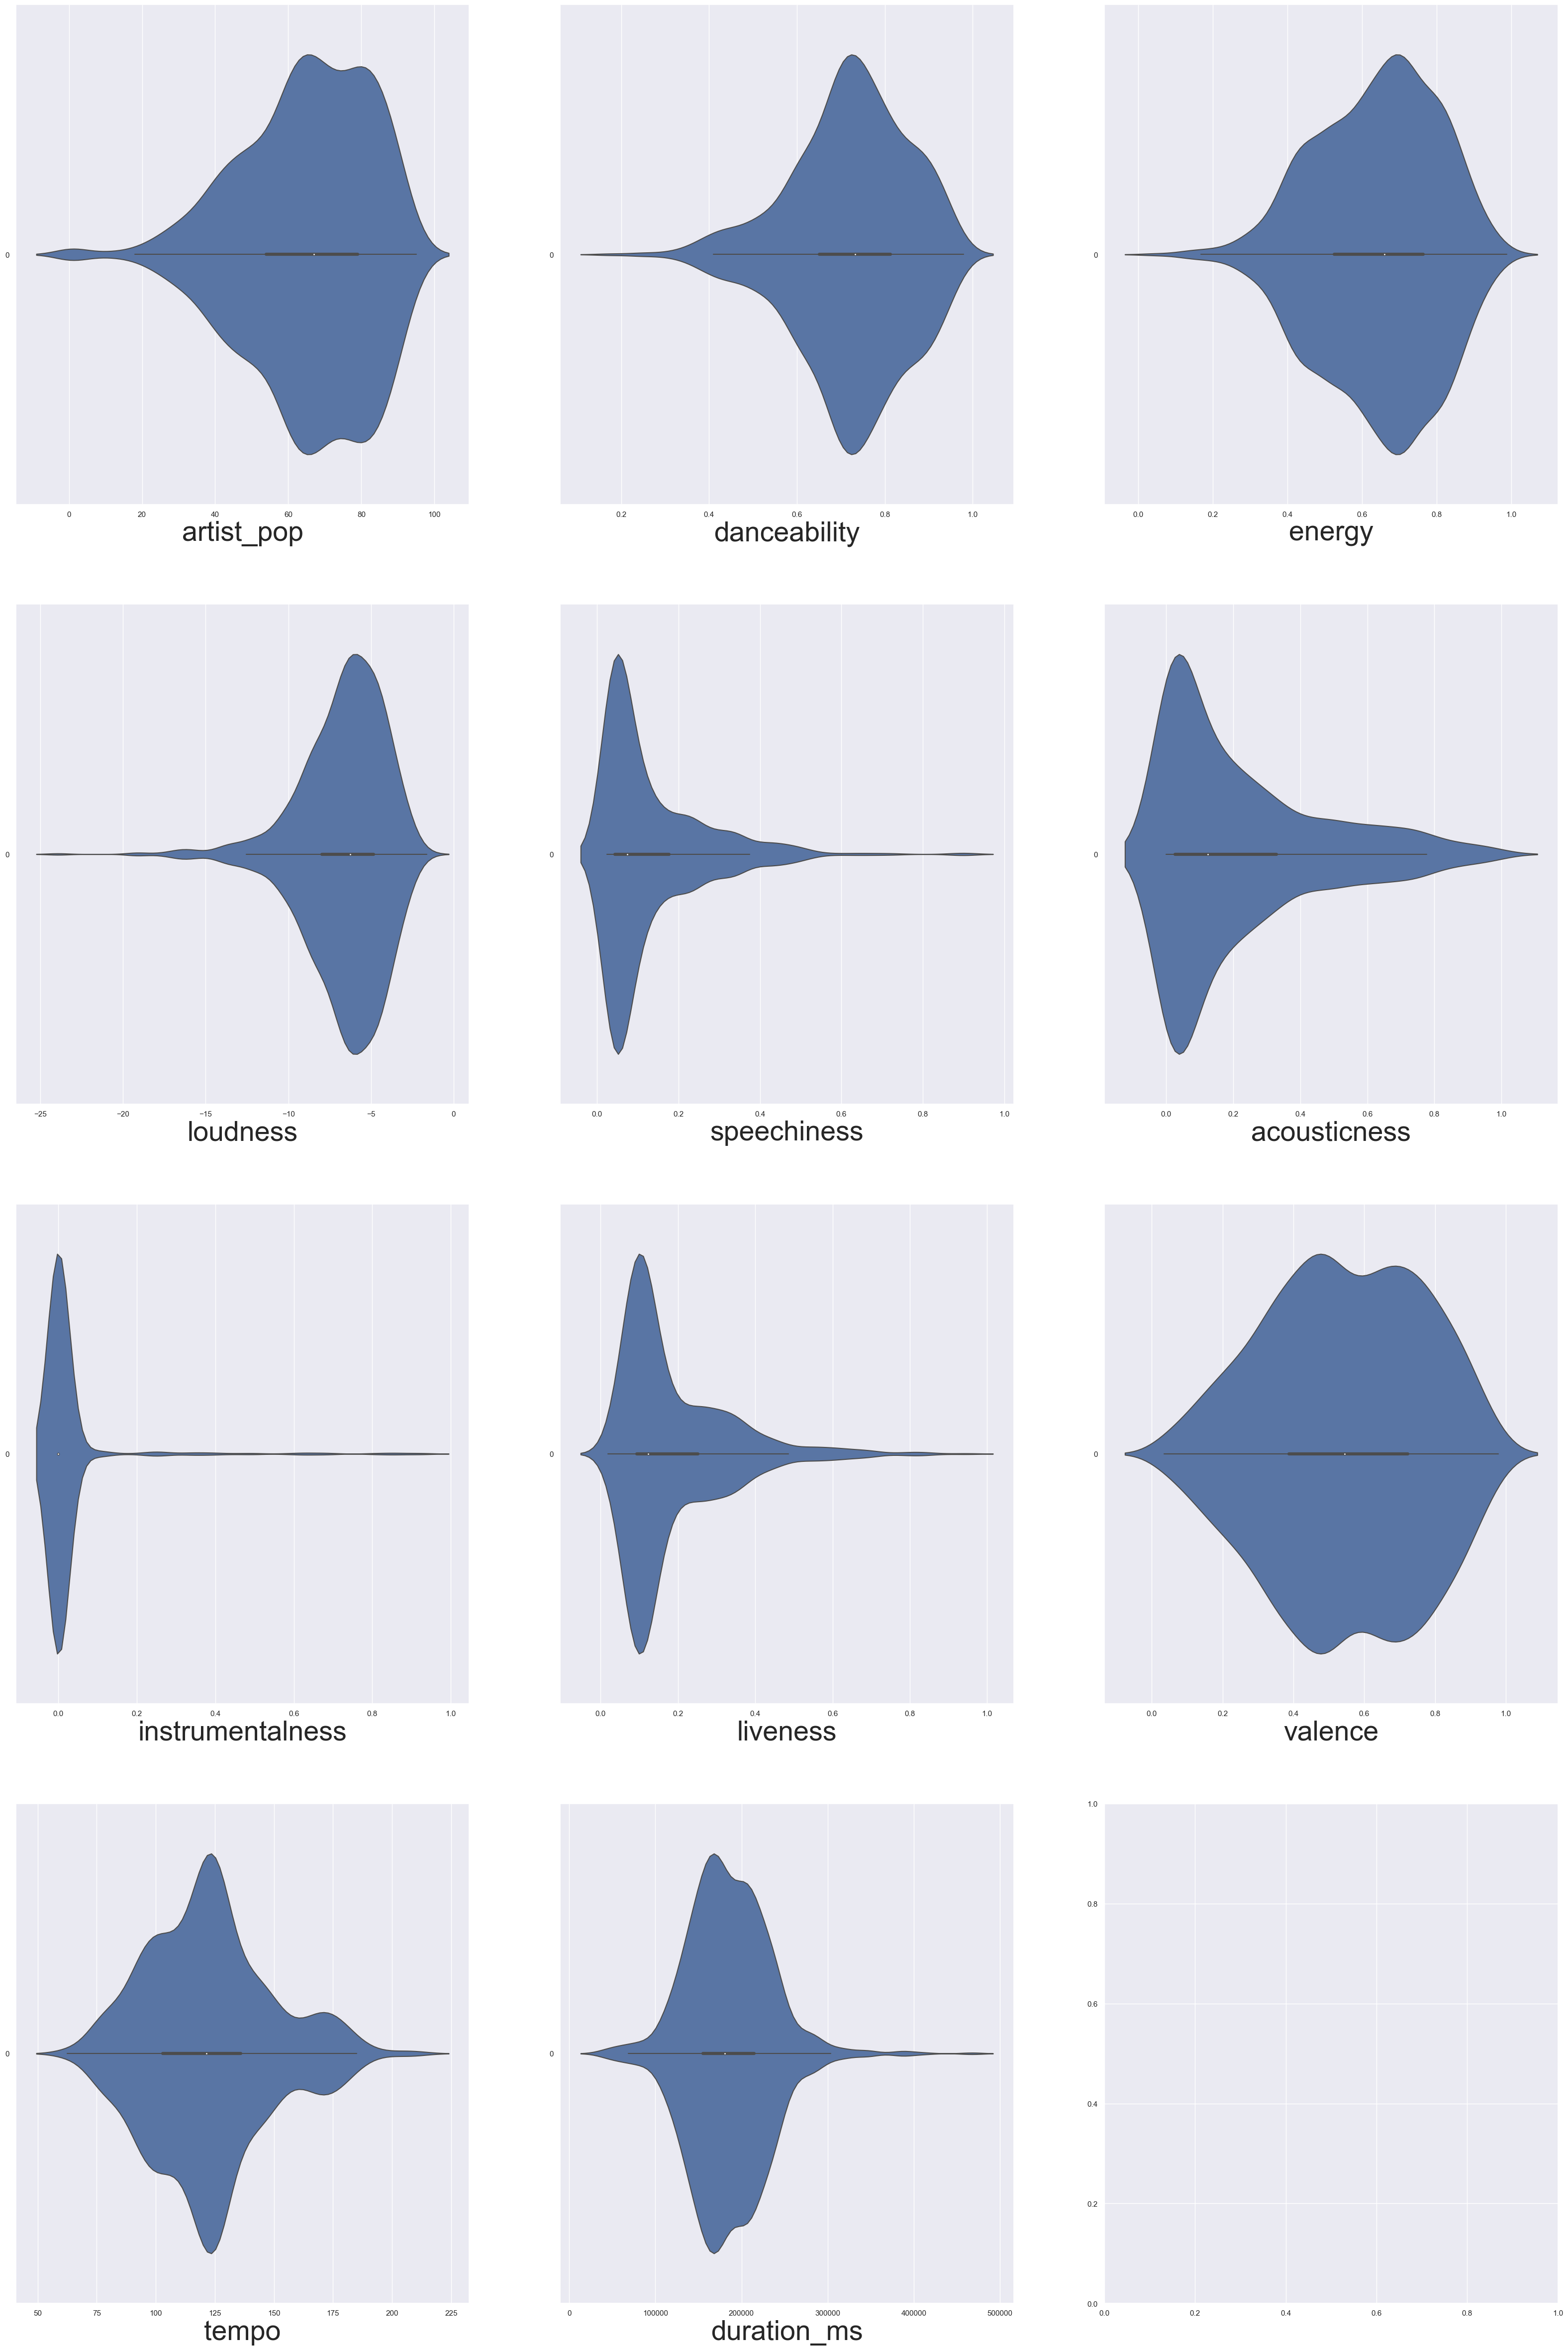

In [10]:
# Draw the distributions of all variables
f, axes = plt.subplots(4,3,figsize=(40,60))
count = 0
row = 0
for var in numericaldata:
    col = count % 3 ;
    sb.violinplot(data = numericaldata[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=40)
    count+=1
    if count % 3 == 0:
        row+=1

##### Comments : 
In this DataSet :

+ artist_pop: A distribution skews moderately to the left. It means that most artists have high popularity scores, with fewer artists having low scores.

+ danceability: A distribution skews moderately to the left. This means that most tracks are danceable.

+ energy: A distribution skews slightly to the left, suggesting that most tracks require high energy levels.

+ loudness: The distribution is significantly left-skewed. That means that most tracks are likely to be loud, with a tail stretching towards lower loudness levels.

+ speechiness: A distribution skews highly to the right. It means that most tracks are mostly music and a bit of speech.

+ acousticness: The distribution is right-skewed, meaning that more tracks are non-acoustic tracks, compared to acoustic tracks.

+ instrumentalness: The distribution is extremely right-skewed. That means that almost all tracks have very low probability of not having vocals.

+ liveness: The distribution is significantly right-skewed, suggests that most tracks are studio recordings, not live recordings.

+ valence: The distribution of valence is fairly symmetrical with a slight tendency for tracks to be more positive.

+ tempo: The distribution is moderately right-skewed. While tempo has a range of values, there's a lean towards faster tempos with a longer tail towards the slower ones.

+ duration_ms: The distribution of track lengths is moderately right-skewed. That means that most tracks are of average length, around 3 minutes


Now, we look for the correlation between our numerical data with the predicted one, which is track_pop.


In [11]:
numerical_trackpop = pd.concat([numericaldata, track_pop] , axis = 1)

In [12]:
numerical_trackpop.corr()

,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_pop
artist_pop,1.000000,-0.110563,0.081564,0.263493,-0.247710,-0.067214,-0.084506,-0.051324,0.001682,-0.022044,0.304090,0.470736
danceability,-0.110563,1.000000,-0.093822,0.020551,0.235288,-0.153914,-0.050239,-0.175707,0.249769,-0.153478,-0.136185,-0.121193
energy,0.081564,-0.093822,1.000000,0.684962,-0.184695,-0.456943,-0.020393,0.104388,0.217992,0.078918,0.085848,0.112186
loudness,0.263493,0.020551,0.684962,1.000000,-0.241647,-0.378584,-0.168198,0.005559,0.176051,0.045439,0.137619,0.234685
speechiness,-0.247710,0.235288,-0.184695,-0.241647,1.000000,0.007862,-0.068444,-0.030379,-0.047419,0.114217,-0.190475,-0.222350
acousticness,-0.067214,-0.153914,-0.456943,-0.378584,0.007862,1.000000,0.119290,-0.019311,-0.068322,-0.091739,-0.068557,-0.071388
instrumentalness,-0.084506,-0.050239,-0.020393,-0.168198,-0.068444,0.119290,1.000000,-0.022017,0.040116,0.040706,-0.044708,-0.055208
liveness,-0.051324,-0.175707,0.104388,0.005559,-0.030379,-0.019311,-0.022017,1.000000,-0.018345,0.013588,-0.031812,-0.038821
valence,0.001682,0.249769,0.217992,0.176051,-0.047419,-0.068322,0.040116,-0.018345,1.000000,0.003103,-0.015413,0.009927
tempo,-0.022044,-0.153478,0.078918,0.045439,0.114217,-0.091739,0.040706,0.013588,0.003103,1.000000,-0.057619,0.005824


<Axes: >

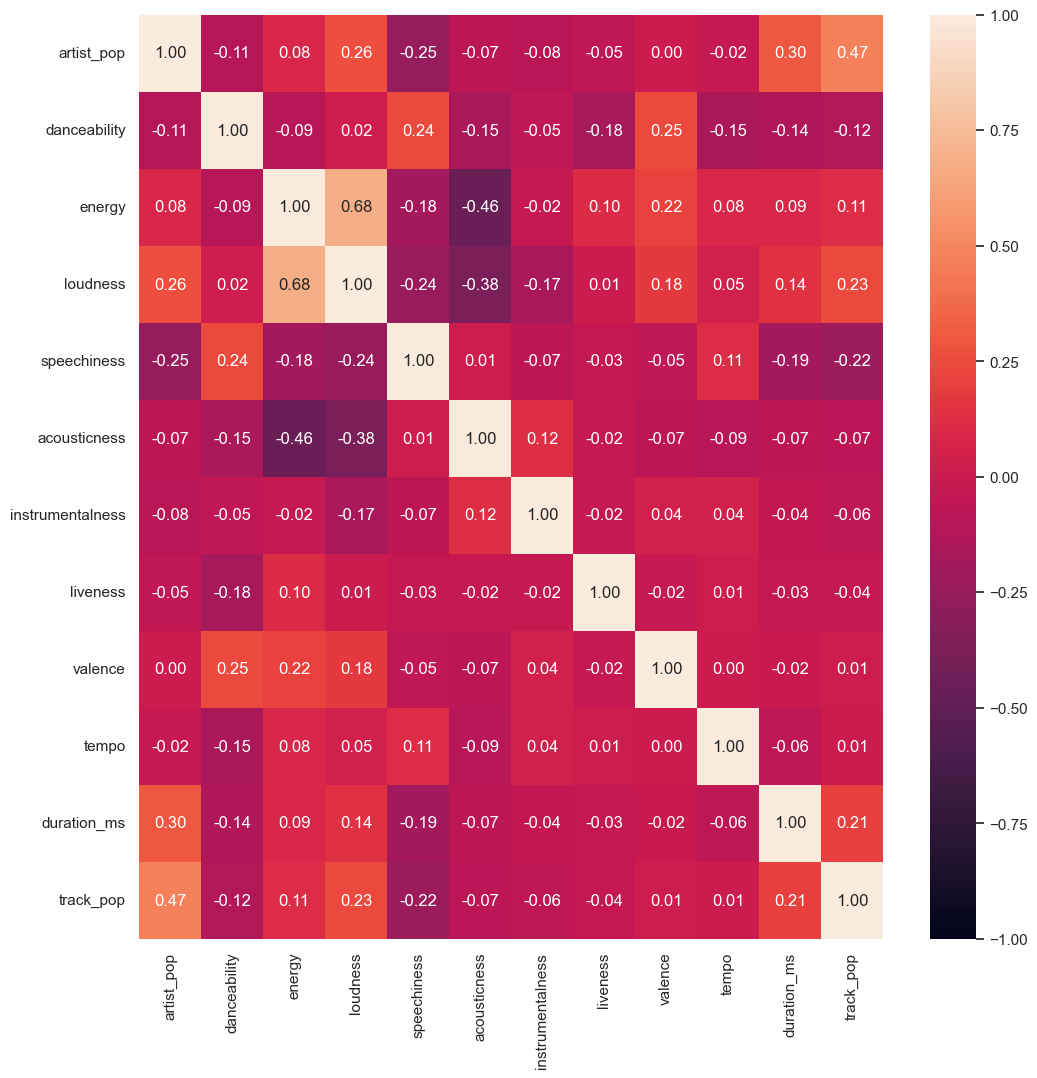

In [13]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(numerical_trackpop.corr(),
           vmin = -1, vmax = 1, annot = True, fmt = ".2f")


From the heatmap, we see that the correlations between track_pop and most the other numerical data are significantly low correlation, being around and below 0.1. The highest correlation 0.47 belongs to artist_pop, followed by loudness, speechiness and duration_ms ( all of them are around 0.21 ). 


This shows that all the variables have a pretty low linear correlation against track_pop. So, they may have a very poor linear relationship. On the other hand, this also suggests that they should be non-linear relationship. 

Therefore, we should also explore non-linear models.

## Categorical data 

Next, we'll look at categorical variables, which are the rest.

In [14]:
categoricaldata = songsdata[[ "track_name", "artist_name", "album", "mode", "key", "time_signature", "Year" ]]
categoricaldata

,track_name,artist_name,album,mode,key,time_signature,Year
0,Running Up That Hill (A Deal With God),Kate Bush,Hounds Of Love,0,10,4,2022
1,As It Was,Harry Styles,As It Was,0,6,4,2022
2,Sunroof,Nicky Youre,Sunroof,1,10,4,2022
3,Heat Waves,Glass Animals,Dreamland (+ Bonus Levels),1,11,4,2022
4,About Damn Time,Lizzo,About Damn Time,0,10,4,2022
...,...,...,...,...,...,...,...
963,Skinny Legend Anthem,Ava Louise,Skinny Legend Anthem,1,11,4,2019
964,Material Girl,Madonna,Celebration (double disc version),1,0,4,2019
965,I Wish - Radio Edit,Skee-Lo,I Wish,1,7,4,2019
966,Oh No I Got a Disease,Buss Crew,Oh No I Got a Disease,0,10,5,2019


Categorical variables include "track_name", "artist_name", and "album", which are unique identifiers for the respective tracks, artists, and their collections. "Mode" and "key" offer qualitative distinctions in the musical composition, classifying tracks into major or minor tonalities and different pitch classes, respectively.Next, "time_signature" denotes the rhythmic pattern and the "year" variable, reflecting the release year, provides temporal context to encapsulate the distinctive musical styles and cultural influences of each period.

Next, let's explore more in each categorical variable.

In [15]:
## Track name and Album

## Let's see which were top 5 most popular tracks and its album in each year 
catagorical_trackpop = pd.concat([categoricaldata, track_pop] , axis = 1)
copy_catagorical_trackpop = catagorical_trackpop.copy()

for i in range ( 2019 , 2023 ) :
    df = copy_catagorical_trackpop[ copy_catagorical_trackpop["Year"] == i ]
    df.sort_values("track_pop", ascending = False, inplace = True )
    arr = df[["track_name","album"]].head(5)
    print("The 5 most popular tracks - its album in" , i , "\n" )
    for i in range( 0 , 5 ):
        info = arr.iloc[ i ]
        print("Top", i + 1, ":" , info["track_name"], "-", info["album"] , "\n")

The 5 most popular tracks - its album in 2019 

Top 1 : Sweater Weather - I Love You. 

Top 2 : Wait a Minute! - ARDIPITHECUS 

Top 3 : we fell in love in october - we fell in love in october / forget her 

Top 4 : Ride It - Ride It 

Top 5 : I Can't Handle Change - I Can't Handle Change 

The 5 most popular tracks - its album in 2020 

Top 1 : Blinding Lights - After Hours 

Top 2 : Save Your Tears - After Hours 

Top 3 : No Role Modelz - 2014 Forest Hills Drive 

Top 4 : Wait a Minute! - ARDIPITHECUS 

Top 5 : Heather - Kid Krow 

The 5 most popular tracks - its album in 2021 

Top 1 : MIDDLE OF THE NIGHT - MIDDLE OF THE NIGHT 

Top 2 : Dandelions - Safe Haven 

Top 3 : Ghost - Justice 

Top 4 : STAY (with Justin Bieber) - STAY (with Justin Bieber) 

Top 5 : Woman - Planet Her 

The 5 most popular tracks - its album in 2022 

Top 1 : Glimpse of Us - Glimpse of Us 

Top 2 : As It Was - As It Was 

Top 3 : Running Up That Hill (A Deal With God) - Hounds Of Love 

Top 4 : Late Night Tal

/var/folders/7h/7c1b1_6n6338cw_hpfm381000000gn/T/ipykernel_96811/3677108029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("track_pop", ascending = False, inplace = True )
/var/folders/7h/7c1b1_6n6338cw_hpfm381000000gn/T/ipykernel_96811/3677108029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("track_pop", ascending = False, inplace = True )
/var/folders/7h/7c1b1_6n6338cw_hpfm381000000gn/T/ipykernel_96811/3677108029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [16]:
## Artist name

## Let's see which were top 5 most popular artists in each year 
catagorical_artistpop = pd.concat([categoricaldata, songsdata["artist_pop"] ] , axis = 1 )
copy_catagorical_artistpop = catagorical_artistpop.copy()

for i in range ( 2019 , 2023 ) :
    df = copy_catagorical_artistpop[ copy_catagorical_artistpop["Year"] == i ]
    df.sort_values( "artist_pop", ascending = False, inplace = True )
    arr = df["artist_name"].unique()[:5]
    print("Top 5 most popular artists of Year", i ,": \n")
    for i, artist in enumerate(arr, start=1):
        print( f"Top {i}: {artist}\n" )


Top 5 most popular artists of Year 2019 : 

Top 1: Taylor Swift

Top 2: Justin Bieber

Top 3: Ed Sheeran

Top 4: Kanye West

Top 5: Doja Cat

Top 5 most popular artists of Year 2020 : 

Top 1: Drake

Top 2: Taylor Swift

Top 3: The Weeknd

Top 4: Harry Styles

Top 5: Kanye West

Top 5 most popular artists of Year 2021 : 

Top 1: Drake

Top 2: Taylor Swift

Top 3: The Weeknd

Top 4: BTS

Top 5: Justin Bieber

Top 5 most popular artists of Year 2022 : 

Top 1: Drake

Top 2: The Weeknd

Top 3: Harry Styles

Top 4: Ed Sheeran

Top 5: Justin Bieber



/var/folders/7h/7c1b1_6n6338cw_hpfm381000000gn/T/ipykernel_96811/4113784264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values( "artist_pop", ascending = False, inplace = True )


In [17]:
## Mode : 0 or 1
## 0 : Major mode
## 1 : Minor mode

categoricaldata["mode"].value_counts()

mode
1    560
0    408
Name: count, dtype: int64

/Users/dunglai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


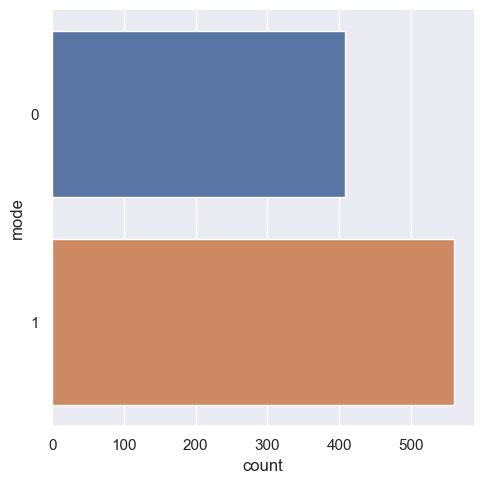

In [18]:
sb.catplot( y = "mode", data = categoricaldata, kind = "count")

The numbers of major mode and minor mode are quite same. It means that this dataset is reasonably good balanced in the number of different modes. 

In [19]:
## Key [0,11]
## 0: C
## 1: C♯/D♭
## 2: D
## 3: D♯/E♭
## 4: E
## 5: F
## 6: F♯/G♭
## 7: G
## 8: G♯/A♭
## 9: A
## 10: A♯/B♭
## 11: B

categoricaldata["key"].value_counts()


key
1     140
0     102
8      91
11     89
7      88
10     77
4      75
5      72
2      70
6      68
9      65
3      31
Name: count, dtype: int64

/Users/dunglai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


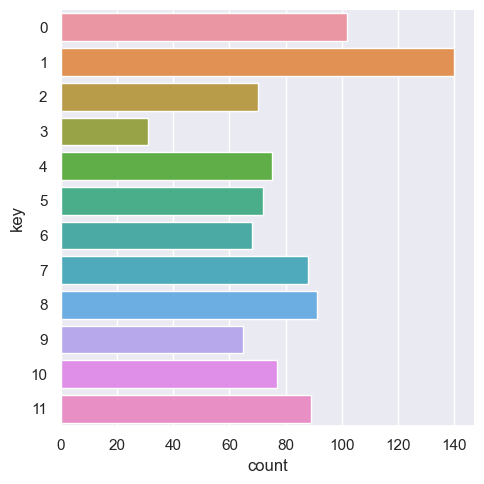

In [20]:
sb.catplot( y = "key", data = categoricaldata, kind = "count")

The most common used key was C♯/D♭, which emphasizes its rich tonal quality, vocal compatibility, emotional expressiveness, and alignment with contemporary trends or artists' unique styles.

In [21]:
## Time Signature [1,5]
## 1 : 3/4
## 2 : 4/4
## 3 : 5/4
## 4 : 6/4
## 5 : 7/4

categoricaldata["time_signature"].value_counts()

time_signature
4    919
3     33
5     11
1      5
Name: count, dtype: int64

/Users/dunglai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


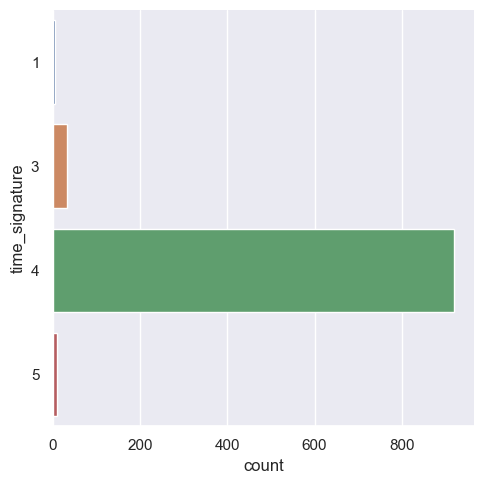

In [22]:
sb.catplot( y = "time_signature", data = categoricaldata, kind = "count")

From the chart, we see that majority of these songs in the dataset were produced at time signature of 6/4. A trend towards 6/4 time in music production suggests a shift towards more complex, flowing rhythms, indicating creativity, experimentation, and a desire to offer listeners a richer emotional and atmospheric experience.

In [23]:
## Year
## 2019
## 2020
## 2021
## 2022

categoricaldata["Year"].value_counts()

Year
2020    292
2022    263
2019    223
2021    190
Name: count, dtype: int64

/Users/dunglai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


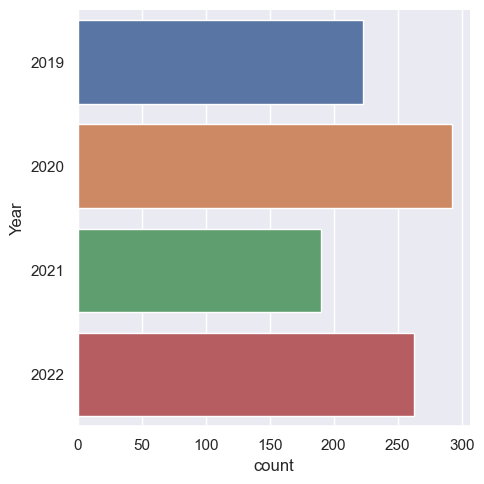

In [24]:
sb.catplot( y = "Year", data = categoricaldata, kind = "count")

The numbers of data in each year are quite same. It means that this dataset is reasonably good balanced in the number of different years. 

#### Now, we'll see categorical variables against the track popularity.

NOTE : Becasue of string datatype, we cannot see the relation between track popularity with some variables, including track_name, artist_name and album.

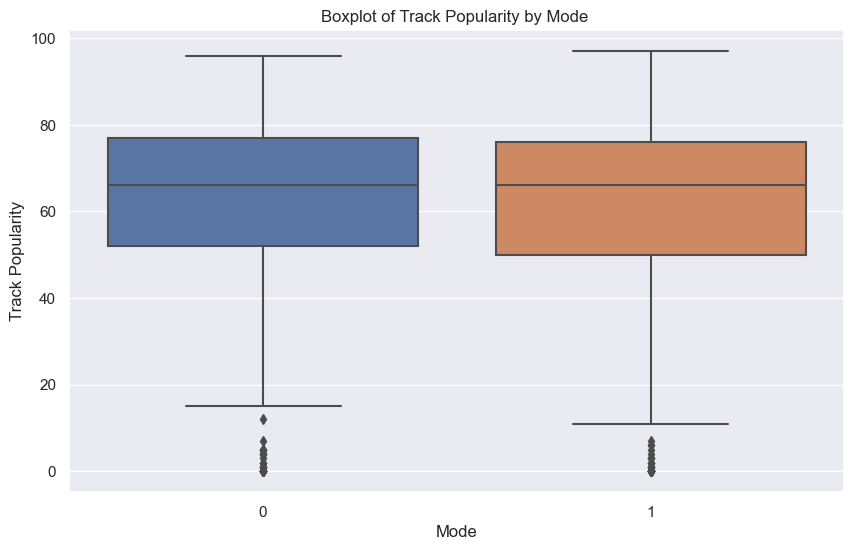

In [25]:
## Track Popularity ~ Mode 

plt.figure(figsize=(10, 6))

sb.boxplot(x = 'mode', y = 'track_pop', data = catagorical_trackpop)
plt.title('Boxplot of Track Popularity by Mode ')
plt.xlabel('Mode')
plt.ylabel('Track Popularity')
plt.show()

Followed by the above graph, we can see that the boxplots of 2 different modes are quite same. This indicates that the popularity of the track won't be overly influenced by its mode.

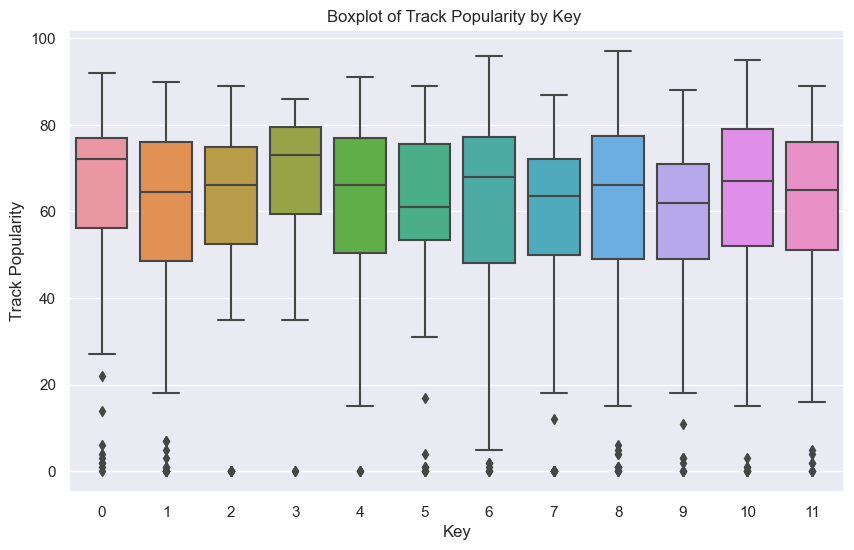

In [26]:
## Track Popularity ~ Key 

plt.figure(figsize=(10, 6))

sb.boxplot(x='key', y='track_pop', data=catagorical_trackpop)
plt.title('Boxplot of Track Popularity by Key ')
plt.xlabel('Key')
plt.ylabel('Track Popularity')
plt.show()

Analyzing the graph, it's evident that the boxes representing different keys are notably straight in line, and their ranges are extensive and remarkably similar. This suggests that although the 'key' factor may slightly influence a track's popularity, the overall relationship between key and popularity remains relatively weak.

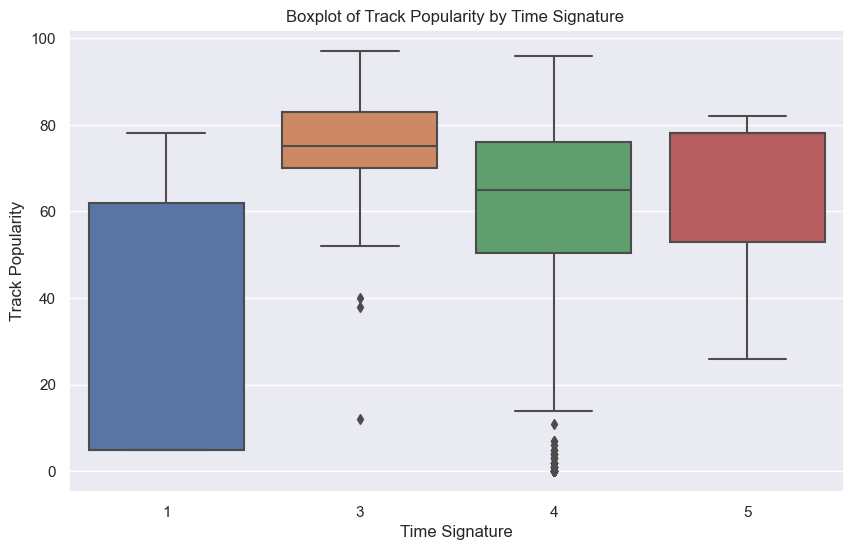

In [27]:
## Track Popularity ~ Time Signature 

plt.figure(figsize=(10, 6))

sb.boxplot(x='time_signature', y='track_pop', data=catagorical_trackpop)
plt.title('Boxplot of Track Popularity by Time Signature ')
plt.xlabel('Time Signature')
plt.ylabel('Track Popularity')
plt.show()

The graph is surprising. Despite the predominance of a 4-beat time signature, the variability among the boxplots for each time signature is substantial. This indicates that time signature may indeed have an impact on track popularity. However, because of unbalanced amount of each time signature, we can consider that the necessary time signature for a good song will mostly be 6/4.

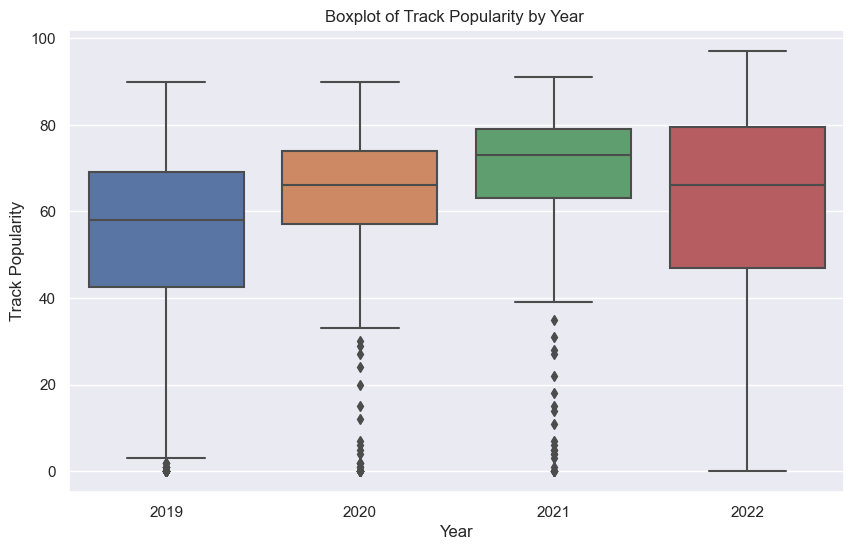

In [28]:
## Track Popularity ~ Year 

plt.figure(figsize=(10, 6))

sb.boxplot(x='Year', y='track_pop', data=catagorical_trackpop)
plt.title('Boxplot of Track Popularity by Year ')
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.show()

By examining the medians and the interquartile ranges (IQRs) shown in the boxplot, we observe an upward trend in track popularity from 2019 to 2021, with each year's median being higher than the last. In 2022, there is a slight decrease in the median track popularity compared to 2021, suggesting a reversal of the previous trend. However, the IQRs do not show a consistent trend over the years. These observations may suggest a variable relation between the release year and track popularity.

## Choosing the variables for machine learning

After examining the relationships between both numerical and categorical variables with track popularity, we will select variables that are suitable for the next phase of our machine learning analysis.

For the numerical variables, we will choose those that have an absolute correlation of 0 or higher with track popularity. These variables include:

+ artist_popularity *
+ danceability *
+ energy *
+ loudness *
+ speechiness *
+ duration_ms *
+ liveness
+ tempo
+ acousticness
+ valence

Regarding categorical variables, we acknowledge that the selection may vary slightly. For this analysis, we have chosen the variable "key" and "year" from among seven potential variables.

We will further validate the significance of these predictors by calculating Mutual Information (MI) scores.

In [29]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


X = songsdata.copy()
y = X.pop("track_pop")

mi_scores = make_mi_scores(X, y)
print(mi_scores.sort_values(ascending=False))


duration_ms         3.333079
track_name          3.087412
album               2.965775
artist_name         1.487819
artist_pop          0.452973
liveness            0.187853
loudness            0.186790
speechiness         0.137554
energy              0.130639
tempo               0.127333
acousticness        0.119140
valence             0.115840
danceability        0.108262
key                 0.097367
Year                0.094939
instrumentalness    0.067651
time_signature      0.021604
mode                0.010619
Name: MI Scores, dtype: float64


For this result, we just choose the non-string variables that around 0.1 above. Therefore, we'll not choose "instrumentalness" as the predictors.

Totally, our predictors will be :
+ duration_ms
+ artist_pop
+ liveness
+ loudness
+ speechiness
+ energy
+ tempo
+ acousticness
+ valence
+ danceability
+ key
+ Year
